# Лабораторная работа 2.1 
Трунов Антон М8О-304Б Вариант 16

# Задание
Реализовать методы простой итерации и Ньютона решения нелинейных уравнений в виде программ, задавая в качестве входных данных точность вычислений. С использованием разработанного программного обеспечения найти положительный корень нелинейного уравнения (начальное приближение определить графически). Проанализировать зависимость погрешности вычислений от количества итераций.
$$
f(x)=x e^{x} + x^{2} - 1
$$

# Newton's method
$$
x_{n+1} = x_{n} + \frac{f(x)}{f'(x)}
$$
where
$$
f'(x)=(x+1) e^{x} + 2x
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def newton(x0,f,fder,eps=1e-5,maxiter=1000):
    niter = 0
    norm = 1
    while norm > eps and niter < maxiter:
        x = x0 - f(x0)/fder(x0)
        norm = abs(x-x0)
        x0 = x
        niter+=1
    return x, niter

# Fixed-point iteration
$$
x_{n+1} = \phi{(x_n)}
$$
where
$$
\phi{(x_n)} = \frac{-e^x \mp \sqrt{e^{2x}+4}}{2}
$$

In [56]:
def fixedp(x0,phi,q,eps=1e-5,maxiter=1000):
    niter = 0
    norm = 1
    while norm > eps and niter < maxiter:
        x = phi(x0)
        norm = abs(x-x0)*q/(1-q)
        x0 = x
        niter += 1
    return x, niter

In [60]:
f = lambda x : x*np.exp(x) + x*x - 1
fder = lambda x: np.exp(x)*(x+1) + 2*x
phi = lambda x:(-np.exp(x)+np.sqrt(np.exp(2*x)+4))/2
x0 = 0.4
x, i = newton(x0,f,fder)
print("Newton:",x,"\nNumber of iterations:",i)
q = 0.301
x, i = fixedp(x0,phi,q)
print("Fixedp:",x,"\nNumber of iterations:",i)

Newton: 0.47817239724048805 
Number of iterations: 4
Fixedp: 0.4781672426395819 
Number of iterations: 8


Определим начальное приближение $x_0$ графически.

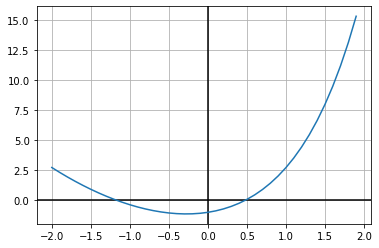

In [15]:
X = np.arange(-2, 2, 0.1)  # start,stop,step
plt.axhline(0, color='black')  # x = 0
plt.axvline(0, color='black')  # y = 0
plt.grid()
plt.plot(X, f(X))
plt.show()

Для соблюдения a posteriori условия в методе простых итераций нужно знать значение $q$, которое находится из условия:
$$
|\phi{'(x)}| \leq q < 1
$$
на интервале в котором ищется корень. Определим $q$ графически сначала для положительного корня.

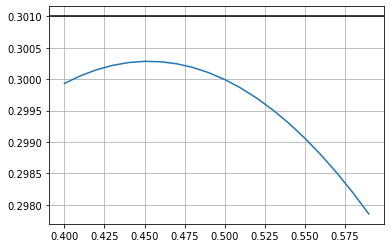

In [65]:
phiDerPositive = lambda x:abs(-np.exp(x)/2+np.exp(2*x)/(2*np.sqrt(np.exp(2*x)+4)))
X = np.arange(0.4, 0.6, 0.01)  # start,stop,step
plt.axhline(0.301, color='black')  # q
plt.grid()
plt.plot(X, phiDerPositive(X))
plt.show()

Нетрудно увидеть, что модуль производной $\phi'{(x)}$ не превышает 0.301 на интервале (0.4;0.6). Таким образом для положительного корня $q=0.301$. Аналогично для отрицательного корня $q=0.22$ на (-1.5;-1)

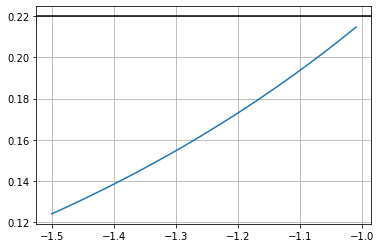

In [68]:
phiDerNegative = lambda x:abs(-np.exp(x)/2-np.exp(2*x)/(2*np.sqrt(np.exp(2*x)+4)))
X = np.arange(-1.5, -1, 0.01)  # start,stop,step
plt.axhline(0.22, color='black')  # q
plt.grid()
plt.plot(X, phiDerNegative(X))
plt.show()